In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("glrl-hab-data.csv", index_col = 0)

In [3]:
training_data_filename = "training_data_PACE.npy"

Loaded 382 entries from training_data_PACE.npy
First entry tuple length: 4
Tuple contents/types: [<class 'str'>, <class 'str'>, <class 'tuple'>, <class 'numpy.ndarray'>]
Lengths/shapes of elements:
  Element 0: PACE_OCI.20240422T181658.L2.OC_AOP.V3_0.nc (type <class 'str'>)
  Element 1: WE4 (type <class 'str'>)
  Element 2: ('WE4', Timestamp('2024-04-22 18:16:58+0000', tz='UTC'), 41.826, -83.19546667, 0.01, 3.40925) (type <class 'tuple'>)
  Element 3: numpy array with shape (4300,)
patch_flat length: 4300


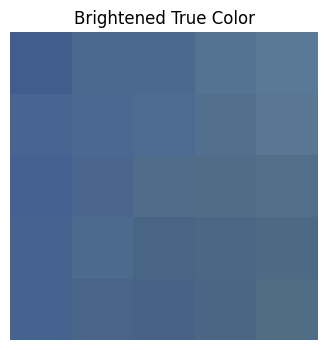

In [4]:
# Load the training data
try:
    data = np.load(training_data_filename, allow_pickle=True)
    print(f"Loaded {len(data)} entries from {training_data_filename}")
except FileNotFoundError:
    raise FileNotFoundError(f"{training_data_filename} not found in the current directory.")

# Inspect first entry to understand tuple structure
first_entry = data[1]
print(f"First entry tuple length: {len(first_entry)}")
print(f"Tuple contents/types: {[type(x) for x in first_entry]}")
print(f"Lengths/shapes of elements:")
for idx, elem in enumerate(first_entry):
    if isinstance(elem, np.ndarray):
        print(f"  Element {idx}: numpy array with shape {elem.shape}")
    else:
        try:
            print(f"  Element {idx}: {elem} (type {type(elem)})")
        except:
            print(f"  Element {idx}: type {type(elem)}")

# Assume structure is (row_index, labels_array, patch_flat_array)
# Adjust these indices if different.
patch_flat = first_entry[3]
print(f"patch_flat length: {patch_flat.size}")

# TODO: Set the correct (h, w, c) for your patches.
# You need to know the spatial dimensions (h, w) and number of bands (c).
# For example, if patch_flat.size == h * w * c, set:
# h, w, c = 9, 9, 3  # replace with your actual dimensions
# You can compute h*w = patch_flat.size / c once you know c, or vice versa.

# Example: try inferring c if you know number of bands used,
# e.g., bands = ["Rrs_488", "Rrs_555", "Rrs_667"] → c = 3.
# Then spatial_pixels = patch_flat.size // c, and if spatial_pixels is a perfect square,
# h = w = int(np.sqrt(spatial_pixels)).
# Otherwise, set h and w explicitly.

# Example inference (only if patch is square and c known):
c = 172
spatial_pixels = patch_flat.size // c
if spatial_pixels * c != patch_flat.size:
    raise ValueError("Flat size not divisible by c; adjust c or patch shape.")
side = int(np.sqrt(spatial_pixels))
if side * side != spatial_pixels:
    raise ValueError("Spatial dimension not square; set h and w manually.")
h, w = side, side

# Ensure patch_flat can reshape to (h, w, c)
if h is None or w is None or c is None:
    raise ValueError("Please set h, w, c to the correct patch dimensions before plotting.")

if patch_flat.size != h * w * c:
    raise ValueError(f"patch_flat size {patch_flat.size} does not match h*w*c = {h*w*c}")

# Reshape and plot RGB for the first entry
patch = patch_flat.reshape((h, w, c))

# TODO: Set the indices corresponding to Red, Green, Blue bands in your patch:
# For example, if bands order was ["Rrs_488", "Rrs_555", "Rrs_667"], then:
#    blue_idx = 0, green_idx = 1, red_idx = 2
red_idx = 150    # e.g., 2
green_idx = 100  # e.g., 1
blue_idx = 50   # e.g., 0

# after reshaping patch_flat → patch (h, w, c) and selecting R,G,B indices:
red = patch[:,:,red_idx]
green = patch[:,:,green_idx]
blue = patch[:,:,blue_idx]
rgb = np.stack([red, green, blue], axis=-1)  # reflectance array

# Normalize using fixed vmax:
vmax = 0.05  # adjust if your scene reflectance peaks lower/higher
rgb_norm = rgb / vmax
rgb_norm = np.clip(rgb_norm, 0, 1)

# Apply gamma correction:
gamma = 1/2.2  # or 1/1.5 for more brightness
rgb_plot = np.clip(rgb_norm ** gamma, 0, 1)

plt.figure(figsize=(4,4))
plt.imshow(rgb_plot, origin='lower')
plt.axis('off')
plt.title("Brightened True Color")
plt.show()

# If you want to loop over multiple entries:
# for entry in data:
#     patch_flat = entry[2]
#     patch = patch_flat.reshape((h, w, c))
#     red = patch[:, :, red_idx]
#     green = patch[:, :, green_idx]
#     blue = patch[:, :, blue_idx]
#     rgb = np.stack([red, green, blue], axis=-1)
#     rgb_plot = np.clip(rgb ** (1/2.2), 0, 1)
#     plt.figure(figsize=(4,4))
#     plt.imshow(rgb_plot, origin='lower')
#     plt.title(f"Row {entry[0]}")
#     plt.axis('off')
#     plt.show()


In [ ]:
i = 0
for entry in data:
    
    for j in range(i, len(df)):
        
        labels = entry[2]
        print(j)
        print(pd.to_datetime(labels[1], utc = True))
        print(pd.to_datetime(df.loc[j, 'timestamp'], utc = True))
        print()
        if labels[0] == df.loc[j, 'station_name'] and \
            pd.to_datetime(labels[1], utc = True) == pd.to_datetime(df.loc[j, 'timestamp'], utc = True):
                print("FOUND ONE")
                labels = (labels[0], labels[1], labels[2], labels[3], labels[4], df.loc[j, 'dissolved_microcystin'], labels[5])
                i = j
                break

0
2024-04-22 18:16:58+00:00
2012-05-15 10:40:00+00:00

1
2024-04-22 18:16:58+00:00
2012-05-15 10:08:00+00:00

2
2024-04-22 18:16:58+00:00
2012-05-15 11:02:00+00:00

3
2024-04-22 18:16:58+00:00
2012-05-15 11:31:00+00:00

4
2024-04-22 18:16:58+00:00
2012-05-31 11:15:00+00:00

5
2024-04-22 18:16:58+00:00
2012-05-31 11:50:00+00:00

6
2024-04-22 18:16:58+00:00
2012-05-31 12:15:00+00:00

7
2024-04-22 18:16:58+00:00
2012-05-31 12:53:00+00:00

8
2024-04-22 18:16:58+00:00
2012-06-11 10:37:00+00:00

9
2024-04-22 18:16:58+00:00
2012-06-11 11:59:00+00:00

10
2024-04-22 18:16:58+00:00
2012-06-22 10:08:00+00:00

11
2024-04-22 18:16:58+00:00
2012-06-22 11:55:00+00:00

12
2024-04-22 18:16:58+00:00
2012-06-22 10:43:00+00:00

13
2024-04-22 18:16:58+00:00
2012-06-22 09:45:00+00:00

14
2024-04-22 18:16:58+00:00
2012-07-12 10:05:00+00:00

15
2024-04-22 18:16:58+00:00
2012-07-12 11:05:00+00:00

16
2024-04-22 18:16:58+00:00
2012-07-12 11:50:00+00:00

17
2024-04-22 18:16:58+00:00
2012-07-12 12:25:00+00:00

18

In [8]:
data

array([['PACE_OCI.20240422T181658.L2.OC_AOP.V3_0.nc', 'WE2',
        ('WE2', Timestamp('2024-04-22 18:16:58+0000', tz='UTC'), 41.76138333, -83.33268333, 0.01, 4.381),
        array([     nan,      nan,      nan, ..., 0.002824, 0.002504, 0.002358],
              dtype=float32)                                                    ],
       ['PACE_OCI.20240422T181658.L2.OC_AOP.V3_0.nc', 'WE4',
        ('WE4', Timestamp('2024-04-22 18:16:58+0000', tz='UTC'), 41.826, -83.19546667, 0.01, 3.40925),
        array([0.003942, 0.004408, 0.004308, ..., 0.003108, 0.002724, 0.002554],
              dtype=float32)                                                    ],
       ['PACE_OCI.20240422T181658.L2.OC_AOP.V3_0.nc', 'WE6',
        ('WE6', Timestamp('2024-04-22 18:16:58+0000', tz='UTC'), 41.705, -83.38661667, 0.01, 3.848),
        array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)],
       ...,
       ['PACE_OCI.20241222T175134.L2.OC_AOP.V3_0.nc', 'WE8',
        ('WE8', datetime.datetime(2024

In [ ]:
import numpy as np

def crop_and_clean_array(data):
    cleaned_entries = []

    for entry in data:
        granule_name, site_code, metadata, patch = entry

        if patch.size == 4300:  # 8x8x11
            patch_3d = patch.reshape(5, 5, 172)
            # Crop center 2x2 pixels (from rows 3:5, cols 3:5)
            cropped = patch_3d[4:5, 4:5, :]  # shape (2, 2, 11)
            reshaped = cropped.reshape(-1)  # Flatten to (44,)

            # Check NaN status per pixel
            pixel_nans = np.isnan(cropped.reshape(1, 172))  # (4, 11)
            pixel_all_nan = np.all(pixel_nans, axis=1)     # (4,)

            if np.sum(~pixel_all_nan) >= 1:
                cleaned_entries.append([granule_name, site_code, metadata, reshaped])

        elif patch.size == 44:  # already 2x2x11
            reshaped = patch.reshape(4, 11)
            pixel_all_nan = np.all(np.isnan(reshaped), axis=1)

            if np.sum(~pixel_all_nan) >= 2:
                cleaned_entries.append(entry)

        else:
            print(f"Skipping entry with unexpected patch size: {patch.size}")

    return np.array(cleaned_entries, dtype=object)


In [ ]:
data = crop_and_clean_array(data)
len(data)

In [ ]:
len(data)

In [ ]:
def average_patch_pixels(data):
    final_entries = []

    for entry in data:
        granule_name, site_code, metadata, patch = entry

        try:
            reshaped = patch.reshape(4, 11)  # 2x2 pixels, 11 channels
            mean_pixel = np.nanmean(reshaped, axis=0)  # shape (11,)
            final_entries.append([granule_name, site_code, metadata, mean_pixel])
        except Exception as e:
            print(f"Failed to process entry {granule_name}: {e}")

    return np.array(final_entries, dtype=object)
data = average_patch_pixels(data)

In [ ]:
np.save(f'training_data_PACE_cropped', np.array(data, dtype=object))

In [ ]:
# Extract labels arrays, replacing NaN with 0
partic_list = []
for entry in data:
    labels = entry[2]  # (particulate)
    if labels is not None and len(labels) >= 2:
        partic_val = labels[4] if not np.isnan(labels[4]) else 0.01
        if partic_val == 0: partic_val = 0.01
        partic_list.append(partic_val)

partic = np.array(partic_list, dtype=float)

# Only values > 0
partic_positive = partic[partic > -1]

print(f"Particulate: total={len(partic)}, >0 count={len(partic_positive)}")

# 1) Histogram with log-scaled x-axis and log-spaced bins
def plot_log_histogram(values, title):
    # Determine bin edges in log space
    min_val = values.min()
    max_val = values.max()
    # Avoid issues if min_val is 0 (we have filtered >0)
    bins = np.logspace(np.log10(min_val), np.log10(max_val), 50)
    plt.figure(figsize=(6, 4))
    plt.hist(values, bins=bins)
    plt.xscale('log')
    plt.title(title + " (log-scaled bins)")
    plt.xlabel("Value (log scale)")
    plt.ylabel("Count")
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.show()

# 2) Histogram of log-transformed values (linear bins on log values)
def plot_hist_log_transformed(values, title):
    log_vals = np.log10(values)
    plt.figure(figsize=(6, 4))
    plt.hist(log_vals, bins=30)
    plt.title(title + " (histogram of log10(values))")
    plt.xlabel("log10(Value)")
    plt.ylabel("Count")
    plt.grid(True, ls='--', alpha=0.5)
    plt.show()

# 3) Boxplot of log-transformed values
def plot_boxplot_log(values, title):
    log_vals = np.log10(values)
    plt.figure(figsize=(4, 6))
    plt.boxplot(log_vals, vert=True)
    plt.title(title + " (boxplot of log10(values))")
    plt.ylabel("log10(Value)")
    plt.grid(True, ls='--', alpha=0.5)
    plt.show()

# 4) Empirical CDF (on log scale)
def plot_ecdf(values, title):
    sorted_vals = np.sort(values)
    n = len(sorted_vals)
    ecdf = np.arange(1, n + 1) / n
    plt.figure(figsize=(6, 4))
    plt.plot(sorted_vals, ecdf)
    plt.xscale('log')
    plt.title(title + " CDF (x-axis log scale)")
    plt.xlabel("Value (log scale)")
    plt.ylabel("ECDF")
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.show()

# Plot for particulate_microcystin > 0
plot_log_histogram(partic_positive, "Particulate Microcystin")
plot_hist_log_transformed(partic_positive, "Particulate Microcystin")
plot_boxplot_log(partic_positive, "Particulate Microcystin")
plot_ecdf(partic_positive, "Particulate Microcystin")

In [ ]:
df.head(2)

In [ ]:
earliest = pd.to_datetime("2025-1-1", utc = True)

for i in range(len(data)):
    labels = data[i][2]
    date = pd.to_datetime(labels[1], utc = True)
    if date < earliest: 
        print(f"{i} - {date} earlier than {earliest}")
        earliest = date

print(earliest)

In [ ]:
label_dict = {}
for i in range(len(data)):
    labels = data[i][1]
    for idx, row in df.iterrows():
        if pd.to_datetime(labels[1]) == pd.to_datetime(row.get("timestamp")) and \
            labels[2] == row.get("lat") and \
            labels[3] == row.get("lon"):
                label_dict[i] = idx

In [ ]:
label_dict

In [ ]:
total = 0
for i in range(len(df)):
    if i not in label_dict.values():
        total = total + 1

print(total)

In [ ]:
len(df) - total

In [ ]:
len(data)

In [ ]:
from collections import Counter
value_counts = Counter(label_dict.values())
print(value_counts)

In [ ]:
df.station_name.unique()

In [ ]:
df